<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_06_Stationaire_tijdsreeksen_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Stationaire tijdsreeksen demo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf #python -m pip install statsmodels
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')  #kies style --> beschikbare styles opvragen via: print(plt.style.available)
import numpy as np

We gaan starten met het inlezen van het bestand: `bezoekers.csv` maar we gaan de kolom Tijdstip gebruiken als de index van de dataframe.

In [2]:
dataset = pd.read_csv('bezoekers.csv',index_col='Tijdstip')
dataset.head()

,dagelijks aantal bezoekers (in honderden)
Tijdstip,
0,17
1,13
2,14
3,17
4,17


## <span style="color:deeppink"> Stationair? </span>
Plot het aantal bezoekers en ga na of de dataset stationair is.

Text(0, 0.5, 'Aantal bezoekers')

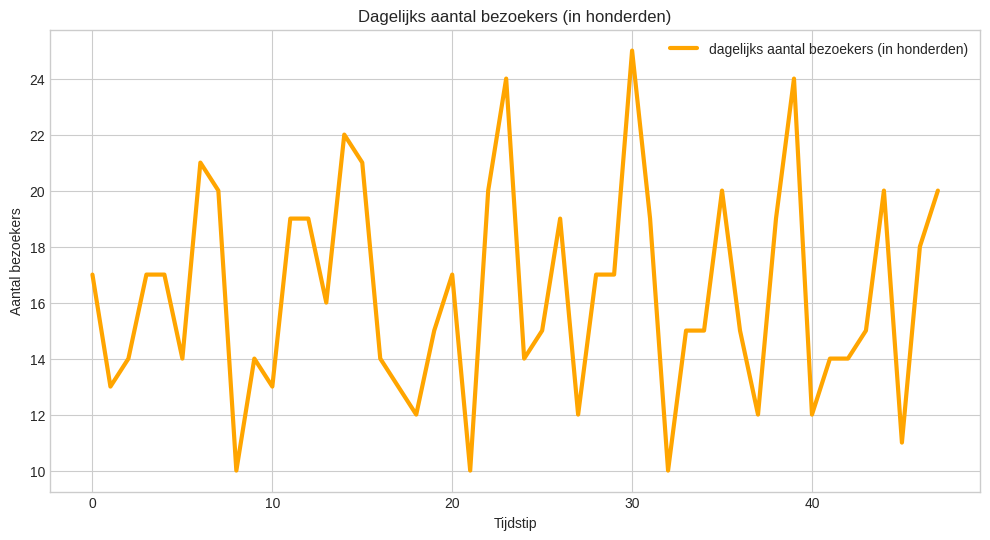

In [3]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
plt.title('Dagelijks aantal bezoekers (in honderden)')
plt.xlabel("Tijdstip")
plt.ylabel("Aantal bezoekers")

In [4]:
from sklearn import datasets,linear_model
x= dataset.index.values
y= dataset['dagelijks aantal bezoekers (in honderden)'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept=',regressionline.intercept_)
print('Richtingscoefficient = ',regressionline.coef_[0])


Intercept= 16.083333333333332
Richtingscoefficient =  0.010638297872340424


In deze code gebruiken we dataset.index.values, linear_model.LinearRegression() en regressionline.fit() om een lineair regressiemodel te trainen. Hier is waarom:

1. Gebruik van dataset.index.values
Wat: Dit pakt de index van de dataset als een NumPy-array.

Waarom: In tijdreeksen is de index vaak de tijd of volgorde waarin de metingen zijn genomen, bijvoorbeeld dagen, weken of maanden. Dit is je onafhankelijke variabele (x).

Voorbeeld: Als je dataset bijvoorbeeld bezoekers per dag bevat, is de index de dagnummer.

2. Gebruik van linear_model.LinearRegression()
Wat: Maakt een nieuwe instantie van het lineaire regressiemodel uit de sklearn bibliotheek.

Waarom: Dit model wordt gebruikt om een lineaire relatie te vinden tussen een onafhankelijke variabele (x) en een afhankelijke variabele (y).

3. Gebruik van regressionline.fit()
Wat: Trained het model met de data.

Waarom: Het leert de beste richtingscoëfficiënt (slope) en intercept om de lijn te beschrijven die de data het beste past.

Waarom .reshape(-1, 1)?

x.reshape(-1, 1) verandert de vorm van de x-variabelen naar een 2D-array.

Dit is nodig omdat scikit-learn verwacht dat de input voor fit() altijd een 2D-array is, zelfs als je maar één kenmerk hebt.

🔍 Betekenis in detail:
x = de inputvariabele (bijvoorbeeld tijdstippen, dus 1, 2, 3, …).

y = de doelvariabele = het aantal bezoekers (in honderden).

x.reshape(-1, 1):

x is oorspronkelijk een 1D-array van tijdstippen.

reshape(-1, 1) zet dit om in een 2D-array met 1 kolom en evenveel rijen als nodig — dit is verplicht voor scikit-learn, want fit() verwacht een 2D-array.

regressionline.fit(...):

Leert een lineaire relatie van de vorm:

𝑦
=
𝑎
⋅
𝑥
+
𝑏
y=a⋅x+b
waarbij a de richtingscoëfficiënt is (slope), en b het intercept.

🔢 Voorbeeld:
Stel:

python
Copy
Edit
x = np.array([1, 2, 3, 4])
y = np.array([10, 12, 15, 18])
Dan leert regressionline.fit(x.reshape(-1,1), y) een rechte lijn die zo goed mogelijk past door die punten, en je kunt dan voorspellen met:

python
Copy
Edit
regressionline.predict([[5]])

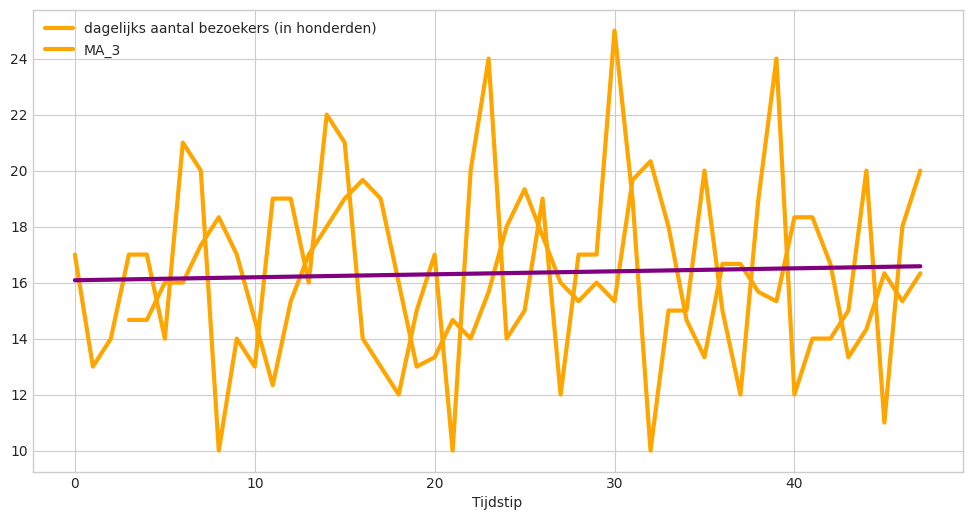

In [7]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
sns.set_style("darkgrid")

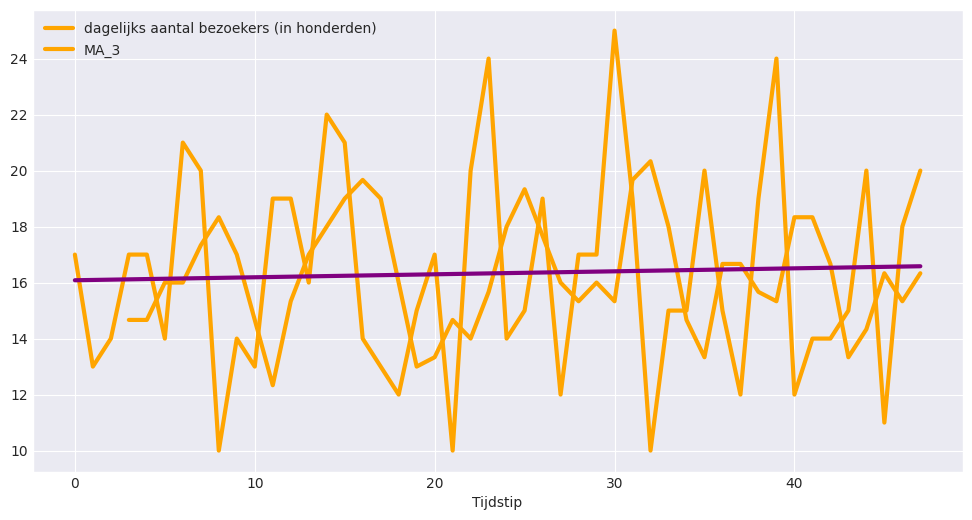

In [8]:
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
sns.set_style("darkgrid")

## <span style="color:deeppink"> Autocorrelatie </span>

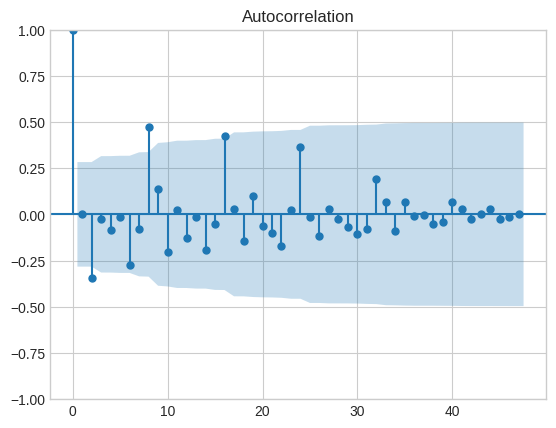

In [6]:
fig = plot_acf(dataset['dagelijks aantal bezoekers (in honderden)'],lags=len(dataset)-1)

Waarom plot_acf() gebruiken?
plot_acf() is een functie uit de statsmodels bibliotheek die gebruikt wordt om de autocorrelatie van een tijdreeks te berekenen en te plotten. Dit is belangrijk voor tijdreeksanalyse omdat je wil weten of er herhalende patronen of seizoensinvloeden zijn.

Wat doet plot_acf() precies?
Autocorrelatie Berekenen: Het berekent hoe sterk een tijdreeks op verschillende vertragingen (lags) met zichzelf correleert.

Plotten: Het plot de autocorrelatie voor elke vertraging (lag) op de x-as en de autocorrelatiecoëfficiënt op de y-as.

Statistische Significantie: De blauwe lijnen geven vaak de 95% betrouwbaarheidsgrenzen aan, wat helpt om te bepalen of een correlatie significant is.

Waarom lags=len(dataset)-1 gebruiken?
Lags: Een lag is gewoon de verschuiving in tijd tussen twee metingen.

Volledig Profiel: Door de lags te zetten op len(dataset)-1 kijk je naar alle mogelijke vertragingen in de data, tot het maximum (n-1).

Praktisch: Dit geeft je het volledige autocorrelatieprofiel van de tijdreeks, wat nuttig is als je op zoek bent naar terugkerende patronen.



## <span style="color:deeppink"> Moving average </span>
Bereken de 3-punts moving average aan de hand van de functies:  
`rolling`:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html  
deze functie zorgt voor een sliding window over je kolom. => Hier pas je dan de gewenste statistische functie op toe  
En de functie   
    `shift`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html  
zorg je ervoor dat alle waarden een rij naar beneden schuiven.

In [5]:
dataset['MA_3'] = dataset['dagelijks aantal bezoekers (in honderden)'].rolling(3).mean().shift(1)
print(dataset.shape)
dataset.head()

(48, 2)


,dagelijks aantal bezoekers (in honderden),MA_3
Tijdstip,,
0,17,NaN
1,13,NaN
2,14,NaN
3,17,14.666667
4,17,14.666667


Text(0, 0.5, 'dagelijks aantal bezoekers (in honderden)')

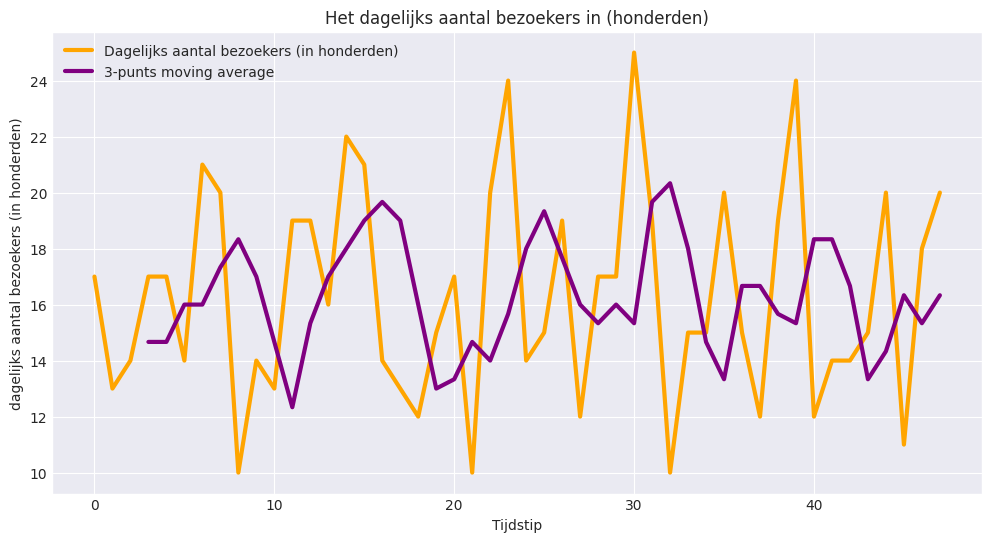

In [9]:
 colors = ['orange','purple']
 dataset.plot(color=colors,linewidth=3,figsize=(12,6))
 plt.legend(labels= ['Dagelijks aantal bezoekers (in honderden)','3-punts moving average'])
 plt.title("Het dagelijks aantal bezoekers in (honderden)")
 plt.xlabel(dataset.index.name)
 plt.ylabel(dataset.columns[0])

## <span style="color:deeppink"> Mean absolute error
Bereken de absolute error van de 3-punts moving average:

In [10]:
dataset['absolute error MA3'] = abs(dataset['dagelijks aantal bezoekers (in honderden)'] - dataset.MA_3)
print(dataset.head())
mae = dataset['absolute error MA3'].mean()
mae

          dagelijks aantal bezoekers (in honderden)       MA_3  \
Tijdstip                                                         
0                                                17        NaN   
1                                                13        NaN   
2                                                14        NaN   
3                                                17  14.666667   
4                                                17  14.666667   

          absolute error MA3  
Tijdstip                      
0                        NaN  
1                        NaN  
2                        NaN  
3                   2.333333  
4                   2.333333  


np.float64(4.059259259259259)

## <span style="color:deeppink"> Mean absolute percentage error

In [11]:
dataset['MAPE MA3'] = abs(dataset['absolute error MA3']/dataset['dagelijks aantal bezoekers (in honderden)']*100)
mape = dataset["MAPE MA3"].mean()
print("De mean absolute percentage error is:",mape,"%")

De mean absolute percentage error is: 26.513994842701415 %


## <span style="color:deeppink"> Exponentiele demping:
Gebruik de functie `emw` om exponentiele demping toe te passen:  
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ewm.html

In [12]:
dataset['exponential_0.1'] = dataset['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=0.1,adjust=False).mean().shift(1)
dataset.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absolute error MA3,MAPE MA3,exponential_0.1
Tijdstip,,,,,
0,17,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000
2,14,NaN,NaN,NaN,16.600
3,17,14.666667,2.333333,13.72549,16.340
4,17,14.666667,2.333333,13.72549,16.406


De methode `ewm(alpha=0.1, ...)` wordt gebruikt voor **exponentiële demping** (*exponential weighted moving average*). Hier is wat `alpha=0.1` betekent:

---

### 📌 `alpha` in `ewm(alpha=0.1)`

* **`alpha` (of smoothing factor)** bepaalt **hoeveel gewicht** je geeft aan de **recente waarden** van de tijdreeks.

#### ➕ Grote alpha (bv. 0.9):

* **Sterk gewicht op de meest recente waarde**
* Voorspelling reageert snel op veranderingen
* Goed voor korte termijn

#### ➖ Kleine alpha (bv. 0.1 zoals hier):

* **Minder gewicht op de meest recente waarde**
* Voorspelling is "vlakker", stabieler
* Goed voor langetermijntrends (minder gevoelig voor schommelingen)

---

### 🔁 Hoe werkt exponentiële demping?

Elke voorspelling is:

$$
F_t = \alpha \cdot Y_{t-1} + (1 - \alpha) \cdot F_{t-1}
$$

Bijvoorbeeld, als:

* $Y_{t-1} = 100$ (waarde gisteren)
* $F_{t-1} = 95$ (voorspelling gisteren)
* $\alpha = 0.1$

Dan:

$$
F_t = 0.1 \cdot 100 + 0.9 \cdot 95 = 95.5
$$

---

### ✅ Samengevat:

* `alpha = 0.1` betekent: **10% gewicht aan de nieuwste observatie**, en **90% aan de eerdere voorspellingen**.
* Hoe kleiner alpha, hoe trager en stabieler de lijn.

---




In [13]:
dataset['absolute error exponentiele demping'] = abs(dataset['dagelijks aantal bezoekers (in honderden)'] - dataset['exponential_0.1'])
dataset.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absolute error MA3,MAPE MA3,exponential_0.1,absolute error exponentiele demping
Tijdstip,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000,4.000
2,14,NaN,NaN,NaN,16.600,2.600
3,17,14.666667,2.333333,13.72549,16.340,0.660
4,17,14.666667,2.333333,13.72549,16.406,0.594


In [14]:
mae_exponential = dataset['absolute error exponentiele demping'].mean()
print(mae_exponential)

3.4251658667716707


## <span style="color:deeppink"> Zoek de optimale alpha

In [15]:
step = 1e-3
alphas = np.arange(start=0,stop=1+step,step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
  exponential = []
  exponential = dataset['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=alpha,adjust=False).mean().shift(1)
  mae.append(abs(dataset['dagelijks aantal bezoekers (in honderden)'] - exponential).mean())
df['mae'] = mae
df.set_index(alphas[1:],inplace=True)
df.index.name= 'Alpha'

minimum_mae = df['mae'].min()
print("The alpha with the lowest MAE is:",minimum_mae,"index:")
print("Index:",df[df['mae'] == minimum_mae].index[0])


df['mae'] = mae
df.set_index(alphas[1:],inplace=True)
df.index.name = 'Alpha'

The alpha with the lowest MAE is: 3.277548181312891 index:
Index: 0.001


Zeker! De code die je toont zoekt automatisch de **beste alpha-waarde** (de smoothing factor) voor **exponentiële demping** op basis van de **laagste gemiddelde fout (MAE)**.

Hieronder leg ik die regels **duidelijk en stap voor stap uit**:

---

### 🔁 **Stap 1: Maak een reeks alpha-waarden**

```python
step = 1e-3
alphas = np.arange(start=0, stop=1+step, step=step)
```

* Dit maakt een lijst van waarden van **0.001 tot en met 1.000** in stappen van **0.001**.
* Dit zijn alle alpha-kandidaten die we gaan testen.

---

### 🔄 **Stap 2: Voor elke alpha → bereken voorspelling en fout**

```python
for alpha in alphas[1:]:  # begin vanaf alpha = 0.001 (dus sla 0 over)
    exponential = dataset['dagelijks aantal bezoekers (in honderden)']\
                    .ewm(alpha=alpha, adjust=False)\
                    .mean()\
                    .shift(1)
```

* `.ewm(alpha=alpha)` → pas exponentiële demping toe met die alpha.
* `.mean()` → neem het gewogen gemiddelde.
* `.shift(1)` → schuif één dag naar beneden zodat je geen toekomstige data gebruikt.

```python
    mae.append(abs(dataset['dagelijks aantal bezoekers (in honderden)'] - exponential).mean())
```

* Vergelijk voorspelling met echte waarden.
* Neem de gemiddelde absolute fout (**MAE**) voor deze alpha.
* Voeg die fout toe aan de lijst `mae`.

---

### 📊 **Stap 3: Maak een DataFrame van de fouten**

```python
df['mae'] = mae
df.set_index(alphas[1:], inplace=True)
df.index.name = 'Alpha'
```

* Sla alle MAE’s op in een DataFrame.
* Stel de alpha-waarden in als index, zodat je later makkelijk de beste kunt vinden of grafieken kunt maken.

---

### 🧠 Wat levert dit op?

Een tabel zoals:

| Alpha | MAE         |
| ----- | ----------- |
| 0.001 | 12.53       |
| 0.002 | 12.48       |
| ...   | ...         |
| 0.237 | **10.92** ✅ |
| ...   | ...         |

Zo vind je de **alpha met de kleinste fout**, dus de beste demping voor jouw tijdreeks.

---



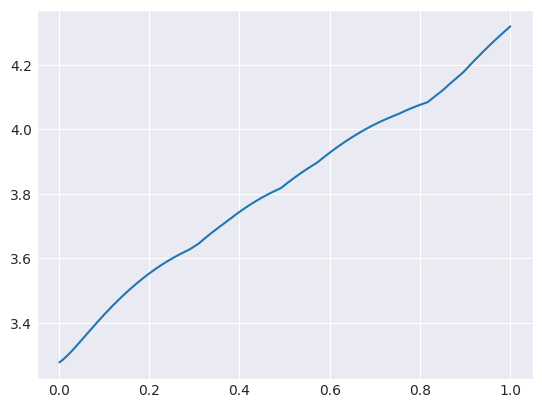

In [16]:
plt.plot(df['mae'])

In [17]:
dataset['exponential_0.001'] = dataset['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=0.001,adjust=False).mean().shift(1)
dataset.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absolute error MA3,MAPE MA3,exponential_0.1,absolute error exponentiele demping,exponential_0.001
Tijdstip,,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000,4.000,17.000000
2,14,NaN,NaN,NaN,16.600,2.600,16.996000
3,17,14.666667,2.333333,13.72549,16.340,0.660,16.993004
4,17,14.666667,2.333333,13.72549,16.406,0.594,16.993011


### **Uitleg van de Code:**

```python
dataset['exponential_0.001'] = dataset['dagelijks aantal bezoekers (in honderden)']
                                    .ewm(alpha=0.001, adjust=False)
                                    .mean()
                                    .shift(1)
```

**Wat deze code doet:**

1. **Exponentieel Gewogen Gemiddelde (EWMA):**

   * **`ewm(alpha=0.001, adjust=False)`** berekent een **Exponentieel Gewogen Gemiddelde** (EWMA) met een **smoothing factor** (`alpha=0.001`), waardoor de **recente waarden** zwaarder wegen bij het berekenen van het gemiddelde.
   * **Lage alpha (0.001)** betekent dat oude waarden **nog steeds invloed hebben**, maar **veel minder** dan recente waarden.

2. **Verschuiven van de Gemiddelde Waarden:**

   * **`.shift(1)`** verplaatst de gemiddelde waarden met **één positie naar beneden**, zodat de voorspelling altijd gebaseerd is op **eerder** beschikbare data, en **niet** op toekomstige waarden.

3. **Nieuwe Kolom Toevoegen:**

   * De resultaten worden opgeslagen in een **nieuwe kolom** met de naam **`exponential_0.001`** in de **`dataset`**.

---

**Waarom doen we dit?**

* **Voorspellingen:** Dit wordt vaak gebruikt om **voorspellingen** te maken op basis van **historische trends**.
* **Smoothing:** Het vermindert **ruis** en zorgt voor een **glad** verloop in de data.
* **Lage Alpha:** Door een lage alpha te kiezen, reageert het gemiddelde **langzamer** op veranderingen in de data, wat nuttig kan zijn voor **stabiele** tijdreeksen.


In [18]:
dataset['absolute error exp alpha 0.001'] = abs(dataset['dagelijks aantal bezoekers (in honderden)'] - dataset['exponential_0.001'])
dataset.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absolute error MA3,MAPE MA3,exponential_0.1,absolute error exponentiele demping,exponential_0.001,absolute error exp alpha 0.001
Tijdstip,,,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000,4.000,17.000000,4.000000
2,14,NaN,NaN,NaN,16.600,2.600,16.996000,2.996000
3,17,14.666667,2.333333,13.72549,16.340,0.660,16.993004,0.006996
4,17,14.666667,2.333333,13.72549,16.406,0.594,16.993011,0.006989


In [19]:
mae_exponential = dataset['absolute error exp alpha 0.001'].mean()
print(mae_exponential)

3.277548181312891


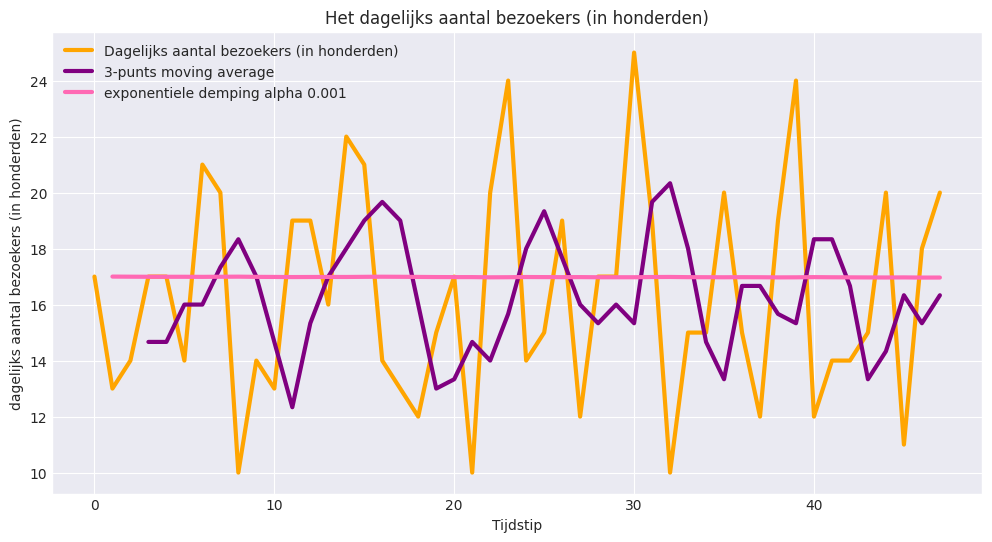

In [20]:
dataset['dagelijks aantal bezoekers (in honderden)'].plot(color='orange',linewidth=3,figsize=(12,6))
dataset['MA_3'].plot(color = 'purple',linewidth=3)
dataset['exponential_0.001'].plot(color = 'hotpink',linewidth=3)
plt.legend(labels = ['Dagelijks aantal bezoekers (in honderden)', '3-punts moving average', 'exponentiele demping alpha 0.001'])
plt.title("Het dagelijks aantal bezoekers (in honderden)")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])
sns.set_style("darkgrid")